In [2]:
cd ..

/Users/raphaelmenguy/code/projet_wagon/elaine_and_the_gentle_boyz


1. Rapporter chaque feature à la pop. du dép.
2. Target: incrément à horizon donné
3. Indicateur the economist restrictions 

In [3]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from egbz.utils import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

# Data loading

In [4]:
dataset = joblib.load('training_data/dataset.pkl')
t_dataset = joblib.load('training_data/t_dataset.pkl')
c_dataset = joblib.load('training_data/c_dataset.pkl')
dataset

<xarray.Dataset>
Dimensions:        (time: 606, zone: 101)
Coordinates:
  * zone           (zone) object '01' '02' '03' '04' ... '974' '976' 'france'
  * time           (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2021-08-28
Data variables: (12/58)
    tpauv          (zone) float64 10.7 18.9 15.5 16.4 14.3 ... nan nan nan nan
    talloc         (zone) float64 2.3 7.5 6.1 5.0 3.6 ... nan nan nan nan nan
    smok           (zone) float64 0.262 0.305 0.262 0.321 ... nan nan nan nan
    ALD1           (zone) float64 814.0 782.0 918.0 804.0 ... 1.132e+03 nan nan
    ALD2           (zone) float64 47.0 45.0 52.0 54.0 64.0 ... 18.0 33.0 nan nan
    ALD3           (zone) float64 841.0 1.003e+03 1.09e+03 ... 630.0 nan nan
    ...             ...
    reg_incid_rea  (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    pos            (zone, time) float64 nan nan nan ... 1.881e+04 1.881e+04
    pos_7j         (zone, time) float64 nan nan nan ... 1.33e+05 1.33e+05
    conf           (zone, time) float64 nan nan nan ... 6.711e+06 6.729e+06
    esms_dc        (zone, time) float64 nan nan nan ... 2.650e+04 2.650e+04
    dc_tot         (zone, time) float64 nan nan nan ... 1.116e+05 1.116e+05

In [5]:
dataset

<xarray.Dataset>
Dimensions:        (time: 606, zone: 101)
Coordinates:
  * zone           (zone) object '01' '02' '03' '04' ... '974' '976' 'france'
  * time           (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2021-08-28
Data variables: (12/58)
    tpauv          (zone) float64 10.7 18.9 15.5 16.4 14.3 ... nan nan nan nan
    talloc         (zone) float64 2.3 7.5 6.1 5.0 3.6 ... nan nan nan nan nan
    smok           (zone) float64 0.262 0.305 0.262 0.321 ... nan nan nan nan
    ALD1           (zone) float64 814.0 782.0 918.0 804.0 ... 1.132e+03 nan nan
    ALD2           (zone) float64 47.0 45.0 52.0 54.0 64.0 ... 18.0 33.0 nan nan
    ALD3           (zone) float64 841.0 1.003e+03 1.09e+03 ... 630.0 nan nan
    ...             ...
    reg_incid_rea  (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    pos            (zone, time) float64 nan nan nan ... 1.881e+04 1.881e+04
    pos_7j         (zone, time) float64 nan nan nan ... 1.33e+05 1.33e+05
    conf           (zone, time) float64 nan nan nan ... 6.711e+06 6.729e+06
    esms_dc        (zone, time) float64 nan nan nan ... 2.650e+04 2.650e+04
    dc_tot         (zone, time) float64 nan nan nan ... 1.116e+05 1.116e+05

In [6]:
t_dataset

<xarray.Dataset>
Dimensions:        (time: 606, zone: 101)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2021-08-28
  * zone           (zone) object '01' '02' '03' '04' ... '974' '976' 'france'
Data variables: (12/26)
    TX             (zone, time) float64 0.0 8.7 9.1 8.7 4.9 ... nan nan nan nan
    UX             (zone, time) float64 98.0 99.0 95.0 97.0 ... nan nan nan nan
    RR             (zone, time) float64 0.0 0.0 0.4 0.6 0.0 ... nan nan nan nan
    pm25           (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    pm10           (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    mobindex1      (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    reg_incid_rea  (zone, time) float64 nan nan nan nan nan ... nan nan nan nan
    pos            (zone, time) float64 nan nan nan ... 1.881e+04 1.881e+04
    pos_7j         (zone, time) float64 nan nan nan ... 1.33e+05 1.33e+05
    conf           (zone, time) float64 nan nan nan ... 6.711e+06 6.729e+06
    esms_dc        (zone, time) float64 nan nan nan ... 2.650e+04 2.650e+04
    dc_tot         (zone, time) float64 nan nan nan ... 1.116e+05 1.116e+05

In [7]:
dataset.zone

<xarray.DataArray 'zone' (zone: 101)>
array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971',
       '972', '973', '974', '976', 'france'], dtype=object)
Coordinates:
  * zone     (zone) object '01' '02' '03' '04' ... '973' '974' '976' 'france'

In [8]:
mdep = [x for x in dataset.zone.values
        if x not in ['france', '971', '972', '973', '974','976']]
deps = dataset.zone
random_deps = np.random.choice(deps, replace=False, size=5)
random_deps

array(['86', '35', '77', '01', '12'], dtype=object)

Voici le dataset maximum sans valeurs manquantes :'( :

In [9]:
data = (dataset
    .sel(zone=mdep, time=slice('2020-06-12','2021-04-21'))
    .drop_vars(names=['conf','esms_dc', 'dc_tot'])
)

In [10]:
data

<xarray.Dataset>
Dimensions:        (time: 314, zone: 95)
Coordinates:
  * zone           (zone) object '01' '02' '03' '04' ... '92' '93' '94' '95'
  * time           (time) datetime64[ns] 2020-06-12 2020-06-13 ... 2021-04-21
Data variables: (12/55)
    tpauv          (zone) float64 10.7 18.9 15.5 16.4 ... 12.2 28.6 16.7 16.8
    talloc         (zone) float64 2.3 7.5 6.1 5.0 3.6 ... 4.4 3.4 10.6 6.0 5.8
    smok           (zone) float64 0.262 0.305 0.262 0.321 ... 0.213 0.213 0.213
    ALD1           (zone) float64 814.0 782.0 918.0 804.0 ... 814.0 769.0 729.0
    ALD2           (zone) float64 47.0 45.0 52.0 54.0 ... 46.0 41.0 52.0 50.0
    ALD3           (zone) float64 841.0 1.003e+03 1.09e+03 ... 687.0 704.0 743.0
    ...             ...
    incid_rea      (zone, time) float64 0.0 0.0 0.0 0.0 0.0 ... 7.0 1.0 12.0 5.0
    incid_rad      (zone, time) float64 2.0 0.0 0.0 1.0 ... 32.0 10.0 70.0 79.0
    incid_dchosp   (zone, time) float64 1.0 0.0 0.0 0.0 0.0 ... 8.0 6.0 11.0 9.0
    reg_incid_rea  (zone, time) float64 0.0 1.0 0.0 0.0 ... 106.0 208.0 149.0
    pos            (zone, time) float64 4.0 0.0 1.0 0.0 ... 1.31e+03 996.0 970.0
    pos_7j         (zone, time) float64 18.0 15.0 15.0 ... 6.588e+03 6.436e+03

In [9]:
joblib.dump(data, 'data/training_data/pure_dataset.pkl')

['data/training_data/pure_dataset.pkl']

# Univariate PolynamialTrend

In [10]:
from sktime.forecasting.trend import PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=3)
y = data['hosp'].sel(zone='75').to_dataframe()['hosp']
y

time
2020-06-12     734.0
2020-06-13     708.0
2020-06-14     709.0
2020-06-15     696.0
2020-06-16     670.0
               ...  
2021-04-17    1743.0
2021-04-18    1797.0
2021-04-19    1797.0
2021-04-20    1786.0
2021-04-21    1798.0
Freq: D, Name: hosp, Length: 314, dtype: float64

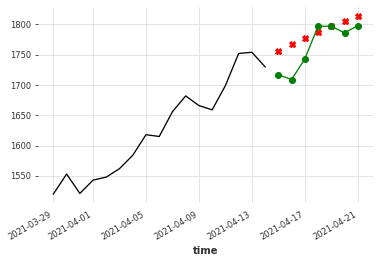

In [11]:
lookback=50
for i in range(1, 8):
    forecaster = PolynomialTrendForecaster(degree=3)
    train = y.iloc[-lookback-7:-7]
    forecaster.fit(train, fh=i)
    y_pred = forecaster.predict()
    plt.plot(y_pred, c='red', marker='X');
y.iloc[290:-7].plot();
y.iloc[-7:].plot(label='label', color='green', marker='o');

In [12]:
def objective(trial):
    forecaster = PolynomialTrendForecaster(
        degree=trial.suggest_int('degree', 1, 25)
    )
    train = y.iloc[trial.suggest_int('lookback',-100, -1)-7:-7]
    forecaster.fit(train, fh=7)
    y_pred = forecaster.predict()
    
    return abs(y.iloc[-1] - y_pred)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
study.trials_dataframe().sort_values('value')

,number,value,datetime_start,datetime_complete,duration,params_degree,params_lookback,state
274,274,1.984761e+00,2021-08-30 16:00:30.243181,2021-08-30 16:00:30.254749,0 days 00:00:00.011568,3,-63,COMPLETE
728,728,1.984761e+00,2021-08-30 16:00:37.183393,2021-08-30 16:00:37.202865,0 days 00:00:00.019472,3,-63,COMPLETE
276,276,1.984761e+00,2021-08-30 16:00:30.266231,2021-08-30 16:00:30.277669,0 days 00:00:00.011438,3,-63,COMPLETE
271,271,1.984761e+00,2021-08-30 16:00:30.204161,2021-08-30 16:00:30.215909,0 days 00:00:00.011748,3,-63,COMPLETE
740,740,1.984761e+00,2021-08-30 16:00:37.473968,2021-08-30 16:00:37.492184,0 days 00:00:00.018216,3,-63,COMPLETE
...,...,...,...,...,...,...,...,...
633,633,8.764921e+06,2021-08-30 16:00:35.576226,2021-08-30 16:00:35.592758,0 days 00:00:00.016532,25,-61,COMPLETE
2,2,1.507067e+07,2021-08-30 16:00:27.211885,2021-08-30 16:00:27.220397,0 days 00:00:00.008512,22,-48,COMPLETE
9,9,1.830787e+10,2021-08-30 16:00:27.251611,2021-08-30 16:00:27.255878,0 days 00:00:00.004267,23,-24,COMPLETE
6,6,2.163750e+10,2021-08-30 16:00:27.236809,2021-08-30 16:00:27.240960,0 days 00:00:00.004151,12,-7,COMPLETE


Ok, mais qu'est-ce que ça donne avec une Cross-val ? Définissons une fonction de cross validation sur des fenêtres glissantes.

In [14]:
def sliding_cross_val_score(
    y,
    estimator=None,
    fh=1,
    step_length= 1,
    lookback=1,
    initial_shift=30
) -> np.array:
    # On crée un générateur de fenêtre glissante (on prend un entier)
    sws =  SlidingWindowSplitter(fh=fh, window_length=lookback)
    window_generator = sws._split_windows(
        start=lookback,
        end=len(y)-fh,
        step_length=step_length,
        fh=fh,
        window_length=lookback
    )
        
    # On itere sur les splits que ça génère 
    cross_val_score = []
    number_of_folds = 0
    for train, test in window_generator:
        number_of_folds += 1
        train, test = y.iloc[train], y.iloc[test]
        estimator.fit(train, fh=fh)
        y_pred = estimator.predict()
        cross_val_score.append(abs(test - y_pred)) 
    
    print(f'number of temporal folds : {number_of_folds}')
    return np.array(cross_val_score)

In [15]:
fh = 1
lookback = 1
forecaster = PolynomialTrendForecaster(degree=1)
cv_result = sliding_cross_val_score(
    y,
    estimator=forecaster)

number of temporal folds : 284


In [16]:
cv_result.mean()

15.471830985915492

In [17]:
fh = 7
cross_val_steps = 10
def objective(trial):
    lookback = trial.suggest_int('lookback', 1, 50)
    degree = trial.suggest_int('degree', 1, 20)
    forecaster = PolynomialTrendForecaster(degree=degree)
    
    cv_result = sliding_cross_val_score(
        y,
        estimator=forecaster,
        fh=fh,
        step_length=cross_val_steps,
        lookback=lookback
    )
    
    return cv_result.mean()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

number of temporal folds : 26
number of temporal folds : 25
number of temporal folds : 26
number of temporal folds : 25
number of temporal folds : 25
number of temporal folds : 28
number of temporal folds : 25
number of temporal folds : 26
number of temporal folds : 27
number of temporal folds : 28
number of temporal folds : 30
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 26
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 31
number of temporal folds : 29
number of temporal folds : 30
number of 

In [18]:
study.optimize(objective, n_trials=1000, n_jobs=-1)
study.trials_dataframe().sort_values('value')

number of temporal folds : 27number of temporal folds : 27
number of temporal folds : 27number of temporal folds : 28number of temporal folds : 27



number of temporal folds : 27
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 29number of temporal folds : 28

number of temporal folds : 30
number of temporal folds : 28
number of temporal folds : 30
number of temporal folds : 31number of temporal folds : 31

number of temporal folds : 30
number of temporal folds : 30
number of temporal folds : 29number of temporal folds : 28

number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 28number of temporal folds : 30

number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 29number of temporal folds : 29

number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 30
number of 

number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 30number of temporal folds : 29

number of temporal folds : 29
number of temporal folds : 28number of temporal folds : 28

number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 29number of temporal folds : 31

number of temporal folds : 28
number of temporal folds : 28number of temporal folds : 29

number of temporal folds : 30number of temporal folds : 30

number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 30
number of temporal folds : 28number of temporal folds : 26

number of temporal folds : 28
number of temporal folds : 27
number of temporal folds : 30
number of temporal folds : 28
number of temporal folds : 30
number of temporal folds : 26
number of temporal folds : 31
number of temporal folds : 28
number of 

number of temporal folds : 30number of temporal folds : 28

number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 25
number of temporal folds : 30
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 30number of temporal folds : 28

number of temporal folds : 29number of temporal folds : 27

number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 28number of temporal folds : 29

number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 30
number of temporal folds : 29
number of 

number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 30number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 29

number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 28
number of temporal folds : 24
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 29
number of temporal folds : 26
number of temporal folds : 29
number of temporal folds : 30number of temporal folds : 30

number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 29
number of temporal folds : 30
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 28
number of temporal folds : 30
number of 

,number,value,datetime_start,datetime_complete,duration,params_degree,params_lookback,state
319,319,4.532959e+01,2021-08-30 16:01:14.966862,2021-08-30 16:01:15.620329,0 days 00:00:00.653467,1,6,COMPLETE
200,200,4.762143e+01,2021-08-30 16:01:02.780040,2021-08-30 16:01:04.148348,0 days 00:00:01.368308,1,5,COMPLETE
991,991,4.762143e+01,2021-08-30 16:02:27.713622,2021-08-30 16:02:29.081559,0 days 00:00:01.367937,1,5,COMPLETE
1041,1041,4.762143e+01,2021-08-30 16:02:33.171223,2021-08-30 16:02:34.417948,0 days 00:00:01.246725,1,5,COMPLETE
625,625,4.808929e+01,2021-08-30 16:01:47.141448,2021-08-30 16:01:47.947174,0 days 00:00:00.805726,1,5,COMPLETE
...,...,...,...,...,...,...,...,...
416,416,5.552298e+17,2021-08-30 16:01:25.024228,2021-08-30 16:01:25.703229,0 days 00:00:00.679001,19,7,COMPLETE
28,28,7.767839e+17,2021-08-30 16:00:46.287681,2021-08-30 16:00:46.386827,0 days 00:00:00.099146,20,8,COMPLETE
143,143,1.026300e+18,2021-08-30 16:00:57.045623,2021-08-30 16:00:57.559316,0 days 00:00:00.513693,19,6,COMPLETE
922,922,1.126008e+18,2021-08-30 16:02:19.693747,2021-08-30 16:02:20.211336,0 days 00:00:00.517589,19,4,COMPLETE


La valeur optimale semble être une approximation linéaire avec un lookback entre 5 et 7, ce qui paraît très raisonnable ! (pour une erreur de 50 environ)

# Univariate Arima.

Essayons maintenant avec un modèle qui pourrait bénificier d'une cross validation avec des expanding windows.

In [19]:
initial_shift=30
step_length=10
number_of_folds=0
ews =  ExpandingWindowSplitter(fh=fh, initial_window=initial_shift)
window_generator = ews._split_windows(
    start=step_length+np.random.randint(0, initial_shift),
    end=len(y)-fh,
    step_length=step_length,
    window_length=step_length,
    fh=fh,
)

for train, test in window_generator:
    number_of_folds += 1
    print(test)
print(f'number of temporal expanding folds is {number_of_folds}')

44
54
64
74
84
94
104
114
124
134
144
154
164
174
184
194
204
214
224
234
244
254
264
274
284
294
304
number of temporal expanding folds is 27


In [20]:
def expanding_cross_val_score(
    y,
    estimator=None,
    fh=1,
    step_length= 10,
    initial_shift=30,
    verbose=False
) -> np.array:
    # On crée un générateur de fenêtre glissante (on prend un entier)
    ews =  ExpandingWindowSplitter(fh=fh, initial_window=initial_shift)
    window_generator = ews._split_windows(
        start=initial_shift,
        end=len(y)-fh,
        step_length=step_length,
        window_length=step_length,
        fh=fh,
    )
        
    # On itere sur les splits que ça génère 
    cross_val_score = []
    number_of_folds = 0
    for train, test in window_generator:
        number_of_folds += 1
        train, test = y.iloc[train], y.iloc[test]
        estimator.fit(train, fh=fh)
        y_pred = estimator.predict()
        cross_val_score.append(abs(test - y_pred)) 
    
    if verbose:
        print(f'number of expanding temporal folds: {number_of_folds}')
    return np.array(cross_val_score)

In [21]:
from sktime.forecasting.arima import AutoARIMA
arima = AutoARIMA()
cv_result = expanding_cross_val_score(
    y, fh=7, estimator=arima,
    initial_shift=30,
    step_length=20)

/Users/raphaelmenguy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/raphaelmenguy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/raphaelmenguy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/raphaelmenguy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

In [22]:
cv_result.mean()

76.5828020705434